# Data Visualization

## Importing Libraries

In [804]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

#Ignores warning messages.
import warnings
warnings.filterwarnings('ignore')

# #Prints all statements
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import itertools

In [805]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 16,9

sns.set(rc={'figure.figsize':(16,9)})

In [806]:
unique_SSN = []

# open file and read the content in a list
with open(r'list_files//unique_SSN.txt', 'r') as fp:
    for line in fp:
        # remove linebreak from a current name
        # linebreak is the last character of each line
        x = line[:-1]

        # add current item to the list
        unique_SSN.append(int(x))

## Import Dataset

In [807]:
df = pd.read_csv('checkpoints//df_final.csv')

In [808]:
df.head()

,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,26.822620,265,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,February,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,31.944960,266,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,March,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,28.609352,267,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,April,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,31.377862,268,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,May,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,24.797347,269,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


### Mapping Credit Score So it will be easy to Calculate correlations.

In [809]:
le = LabelEncoder()
map_credit_score = {'Good' : 0,'Poor' : 1,'Standard' : 2}

In [810]:
df_map = df.copy()
df_map['Credit_Score'] = df['Credit_Score'].map(map_credit_score)

# Visualizaiton

In [811]:
print('----- Null Values -----')
df.isna().sum()

----- Null Values -----


Month                          0
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     4479
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
dtype: int64

In [812]:
print('----- DataFrame Description -----')
df.info()

----- DataFrame Description -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int64  
 2   SSN                       100000 non-null  int64  
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  int64  
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  int64  
 10  Type_of_Loan              100000 non-null  object 
 11  Delay_from_due_date       100000 non-null  int64  
 12  Num_of_Delayed_Payment    100000 non-null  float64
 13  Changed_Cre

### Creating a empty useful columns dictionary with thier respective correlation.

In [813]:
Credit_Score_useful_column_dict = {}

## Month

### Checking Correlation with Month.

In [814]:
df_month = df.copy()
df_month['Month'] = le.fit_transform(df_month['Month'])

In [815]:
corr = df_month['Month'].corr(df_map['Credit_Score'])
corr

0.0038855955803046667

In [816]:
# sns.countplot(data = df,x = 'Month', hue = 'Credit_Score' )

##### Little or no Correlation between Month and Credit_Score.

## Age

### Checking Correlation

In [817]:
corr = df['Age'].corr(df_map['Credit_Score'])
corr

-0.05876828266608652

### Age seems to be decently Correlated.

### Map age.

In [818]:
def map_age(age):
    if age in range(10,20):
        return 0
    elif age in range(20,30):
        return 1
    elif age in range(30,40):
        return 2
    elif age in range(40,50):
        return 3
    elif age in range(50,60):
        return 4
    elif age in range(60,70):
        return 5
    elif age in range(70,80):
        return 6
    elif age in range(80,90):
        return 7
    elif age in range(90,101):
        return 8   

In [819]:
df_age = df.copy()
df_age['Age'] = df['Age'].apply(map_age)

### Count Plot

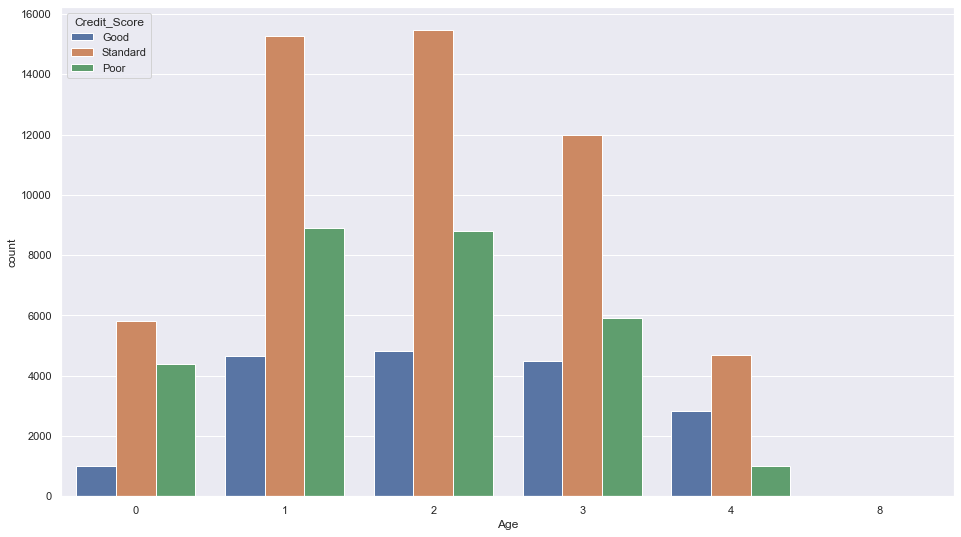

In [820]:
sns.countplot(data = df_age,x = 'Age', hue = 'Credit_Score' );

### Distribution Plot.

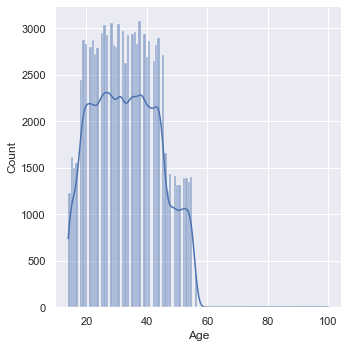

In [821]:
sns.displot(df['Age'],kde = True);

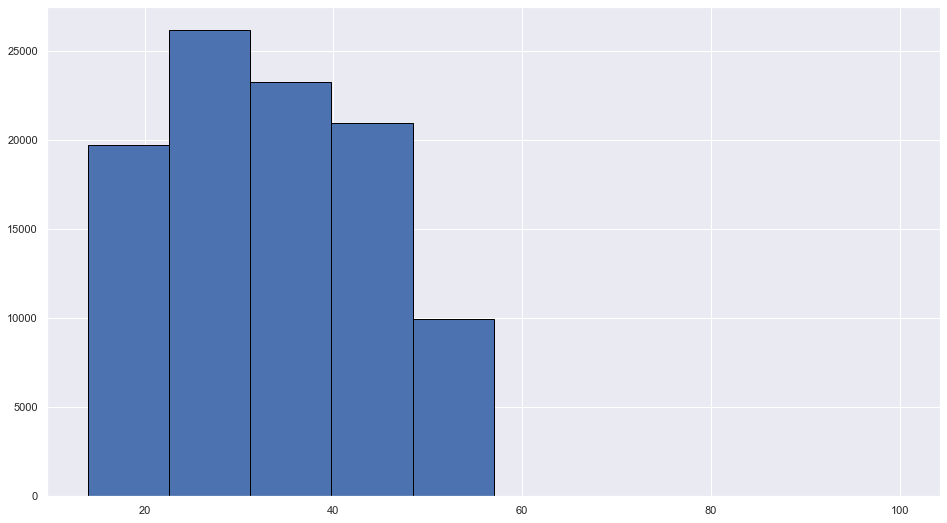

In [822]:
plt.hist(df['Age'],ec ='black');

### Box Plot.

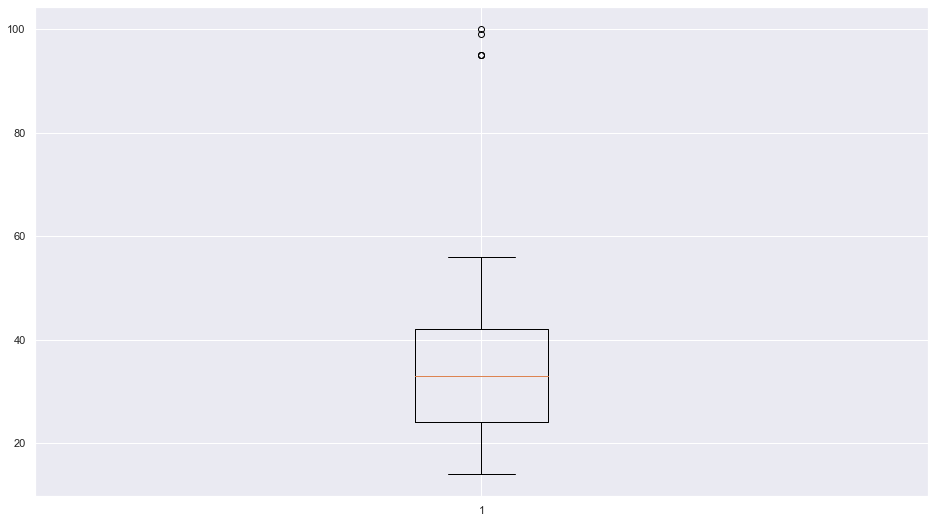

In [823]:
plt.boxplot(df['Age']);

##### Age is positively skewed or right skewed.Outliers may need to be handled.

## Occupation

### Checking Correlation

In [824]:
df_occupation = df.copy()
df_occupation['Occupation'] = le.fit_transform(df_occupation['Occupation'])

In [825]:
corr = df_occupation['Occupation'].corr(df_map['Credit_Score'])
corr

0.005548356084391303

##### Looks like Occupation doesnot really matter and doesnot look correlated.

## Annual Income.

### Checking Correlation.

In [826]:
corr = df['Annual_Income'].corr(df_map['Credit_Score'])
corr

0.0029062022046449096

##### Annual Income doesnot seem that important.

# Monthly_Inhand_Salary

## Checking Correlation

In [827]:
corr = df['Monthly_Inhand_Salary'].corr(df_map['Credit_Score'])
corr

-0.07895538995801313

##### Seems Fairly Correlated.

In [828]:
df['Monthly_Inhand_Salary'].describe()

count    100000.000000
mean       4198.439347
std        3187.280822
min         303.645417
25%        1626.594167
50%        3096.378333
75%        5961.664375
max       15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

## Mapping Monthly_Inhand_Salary

In [829]:
df_monthly_inhand_salary = df.copy()
def map_monthly_inhand_salary(salary):
    if salary < 1792:
        return 0
    if salary  >= 1792 and salary > 3853:
        return 1
    if salary >= 3853 and salary < 8595:
        return 2
    else:
        return 3

In [830]:
df_monthly_inhand_salary['Monthly_Inhand_Salary'] = df_monthly_inhand_salary['Monthly_Inhand_Salary'].map(map_monthly_inhand_salary)

## Plotting

### Count Plot

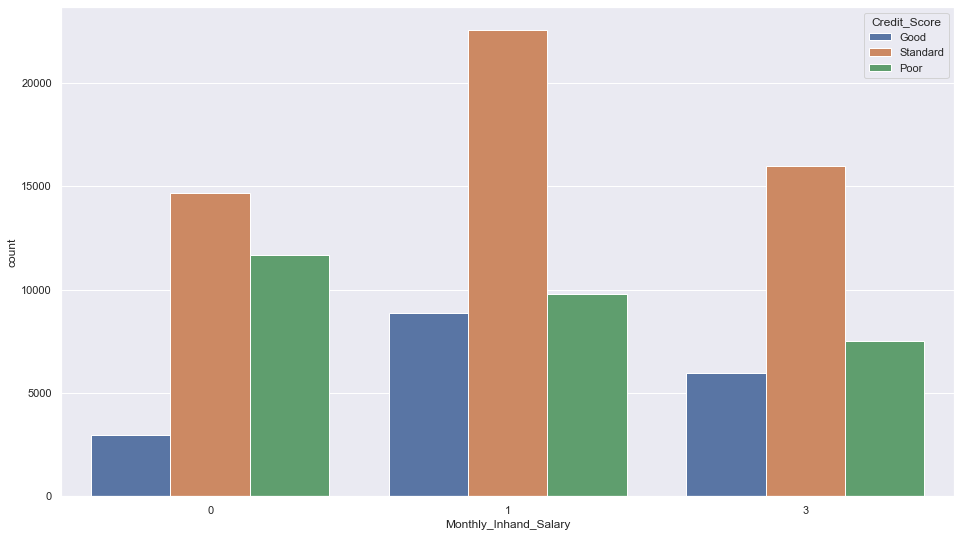

In [831]:
sns.countplot(data = df_monthly_inhand_salary,x = 'Monthly_Inhand_Salary', hue = 'Credit_Score' );

##### The Data present Seems to be for the least 25% and greatest 25%.

### Dist Plot

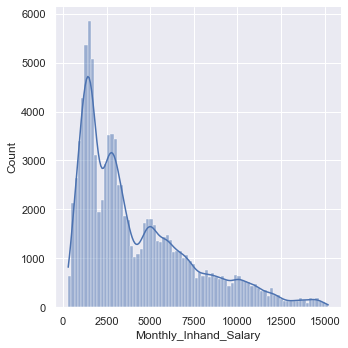

In [832]:
sns.displot(df['Monthly_Inhand_Salary'],kde = True);

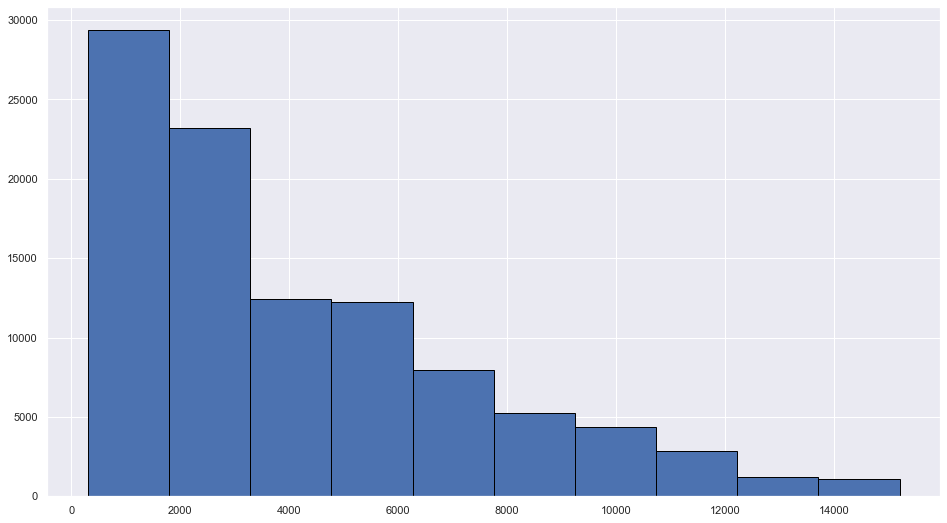

In [833]:
plt.hist(df['Monthly_Inhand_Salary'],ec ='black');

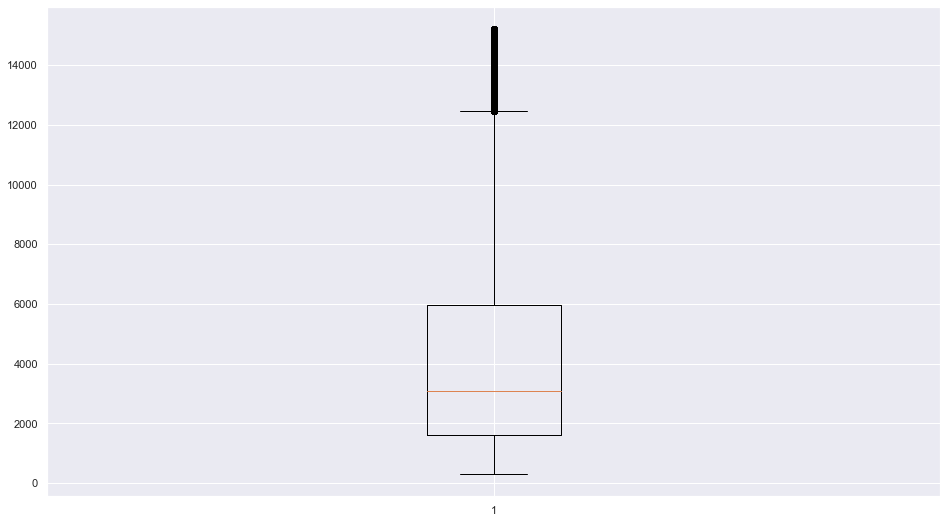

In [834]:
plt.boxplot(df['Monthly_Inhand_Salary']);

##### The Plot is extremely Positive or Right Skewed.

### Adding in the dictionary

In [835]:
Credit_Score_useful_column_dict['Monthly_Inhand_Salary'] = corr

# Num_Bank_Accounts

### Checking Correlation

In [836]:
corr = df['Num_Bank_Accounts'].corr(df_map['Credit_Score'])
corr

0.1732344260940423

##### Num_Bank_Accounts seems to be well correlated.

## Plots

### CountPlot

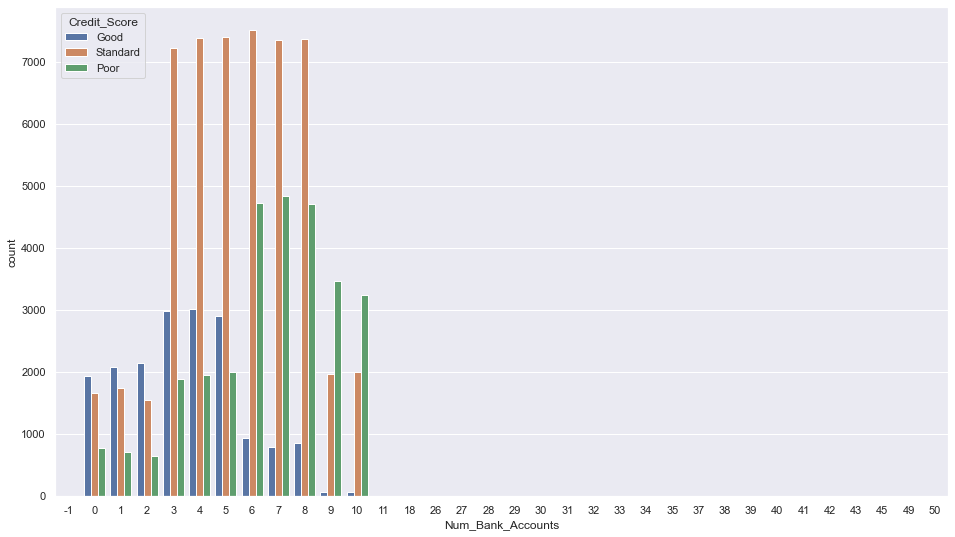

In [837]:
sns.countplot(data = df,x = 'Num_Bank_Accounts', hue = 'Credit_Score' );

### Distribution Plot

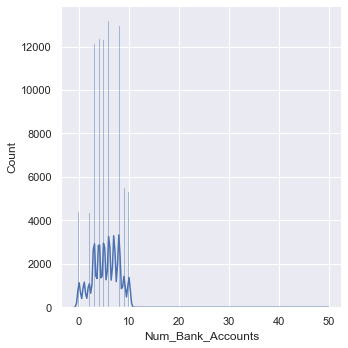

In [838]:
sns.displot(df['Num_Bank_Accounts'],kde = True);

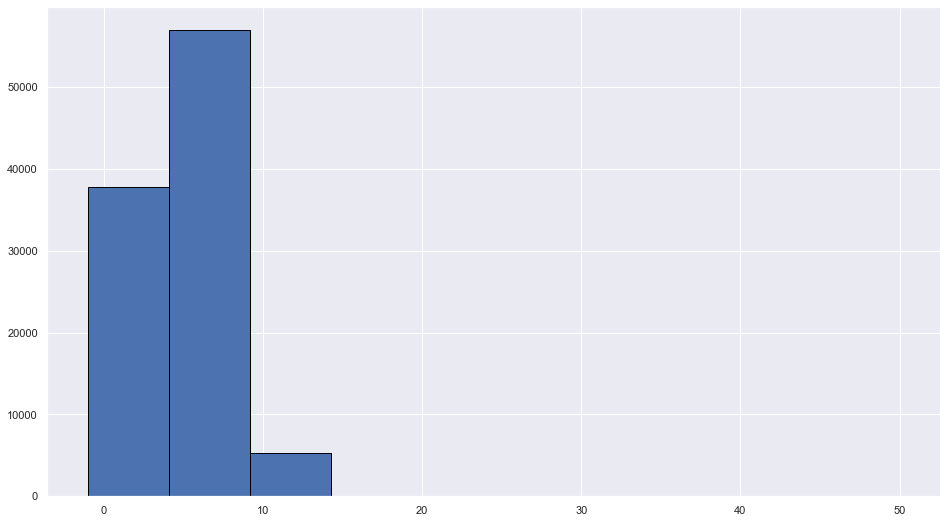

In [839]:
plt.hist(df['Num_Bank_Accounts'],ec ='black');

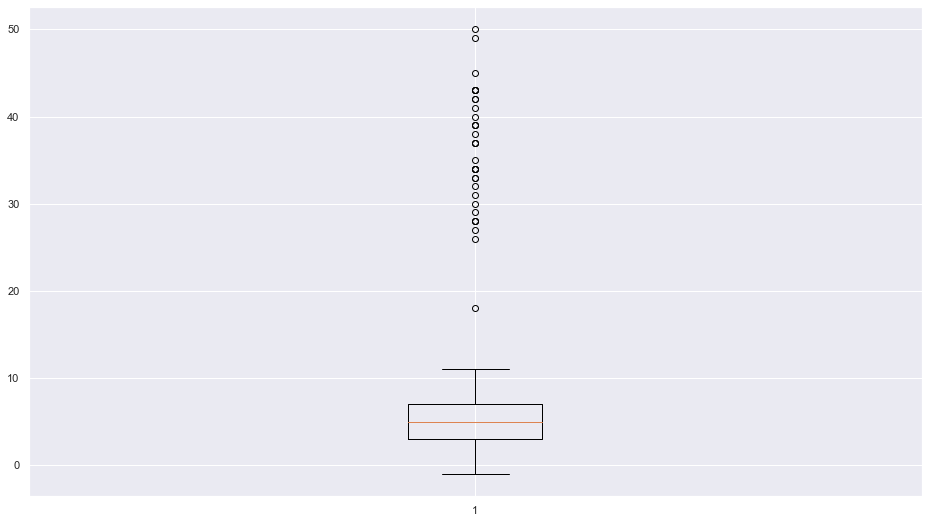

In [840]:
plt.boxplot(df['Num_Bank_Accounts']);

##### The outliers need to be handled here.

### Adding Num_Bank_Accounts 

In [841]:
Credit_Score_useful_column_dict['Num_Bank_Accounts'] = corr


# Num_Credit_Card

### Checking Correlation

In [842]:
corr = df['Num_Credit_Card'].corr(df_map['Credit_Score'])
corr 

0.10959523004266675

## Plots

### Count Plot

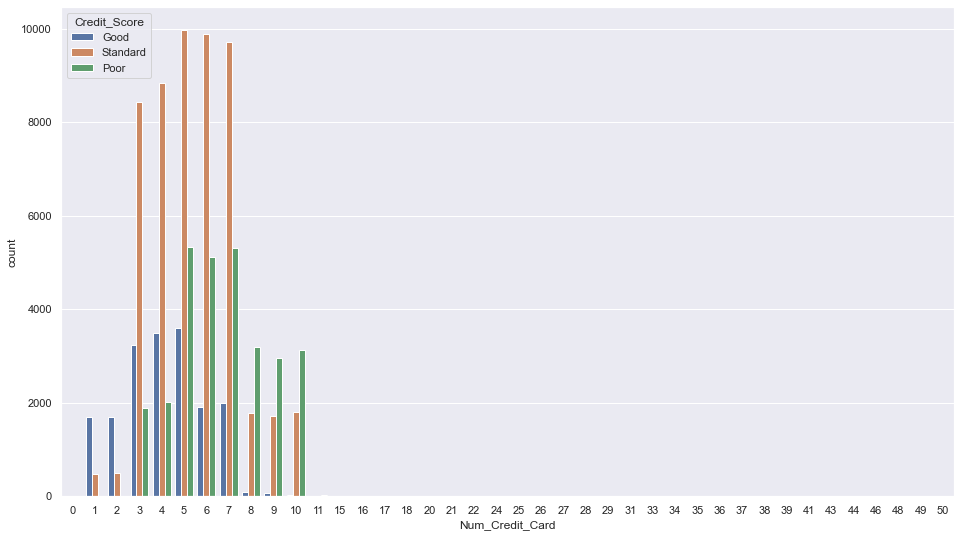

In [843]:
sns.countplot(data = df_age,x = 'Num_Credit_Card', hue = 'Credit_Score' );

### Distribution Plot

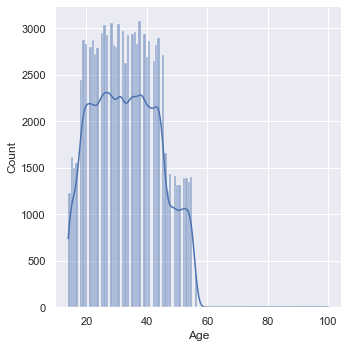

In [844]:
sns.displot(df['Age'],kde = True);

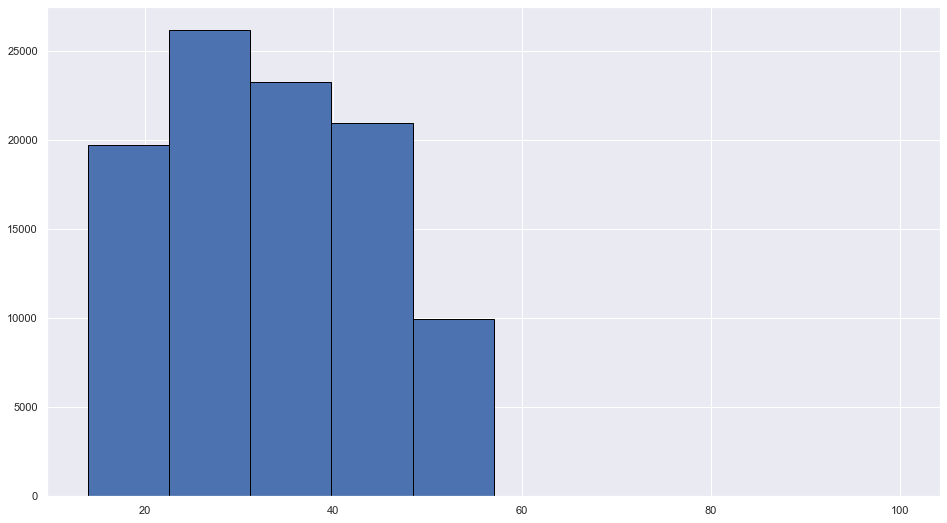

In [845]:
plt.hist(df['Age'],ec ='black');

### Box Plot

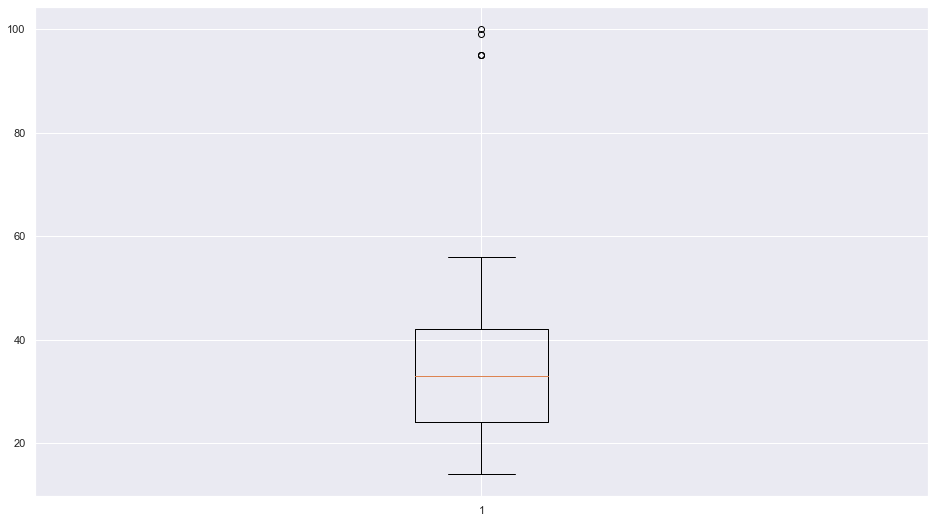

In [846]:
plt.boxplot(df['Age']);

##### Also consists of Outliers

### Adding to Correlation

In [847]:
Credit_Score_useful_column_dict['Num_Credit_Card'] = corr

# Interest_Rate

### Checking Correlation

In [848]:
corr = df['Interest_Rate'].corr(df_map['Credit_Score'])
corr

0.12016992140838731

## Plots

### Countplot

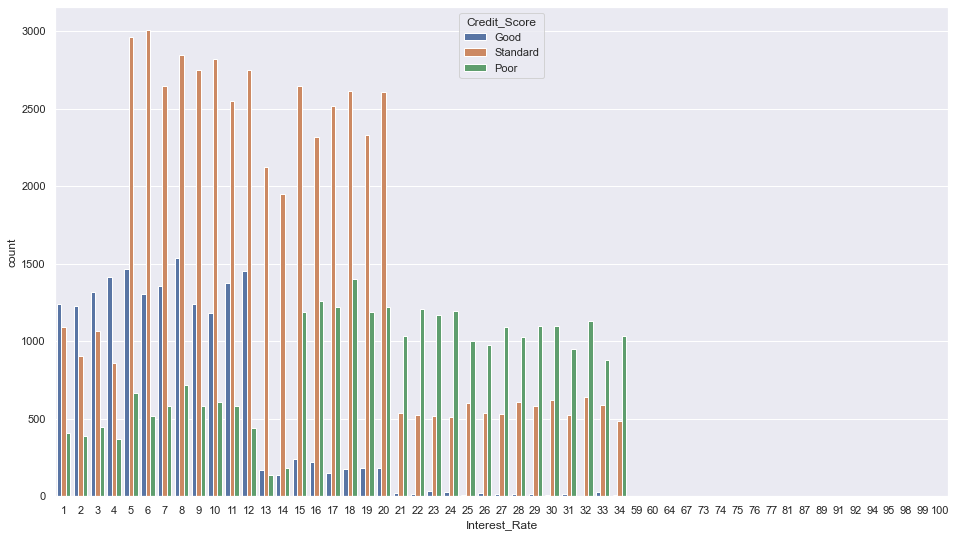

In [849]:
sns.countplot(data = df_age,x = 'Interest_Rate', hue = 'Credit_Score' );

### Distribution Plot

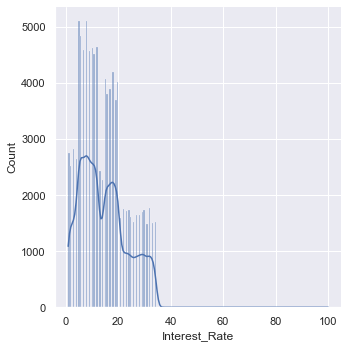

In [850]:
sns.displot(df['Interest_Rate'],kde = True);

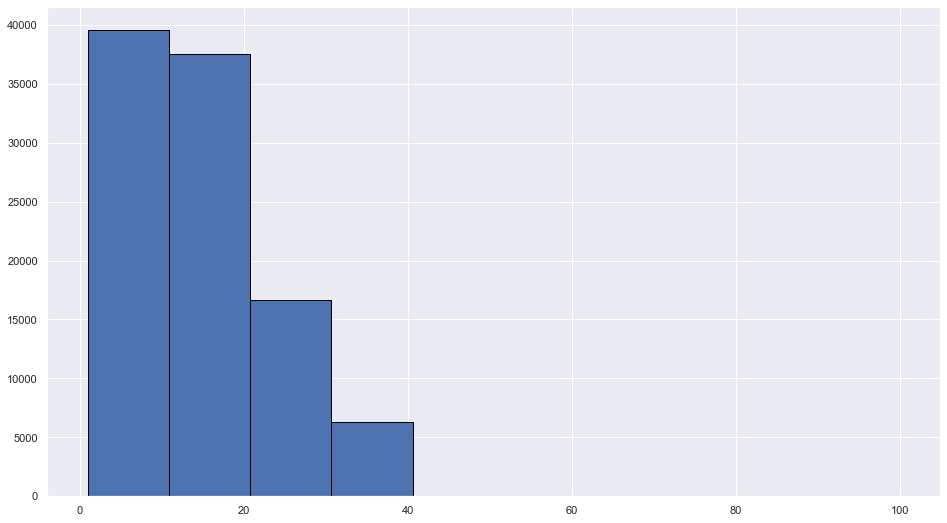

In [851]:
plt.hist(df['Interest_Rate'],ec ='black');

### Box Plot

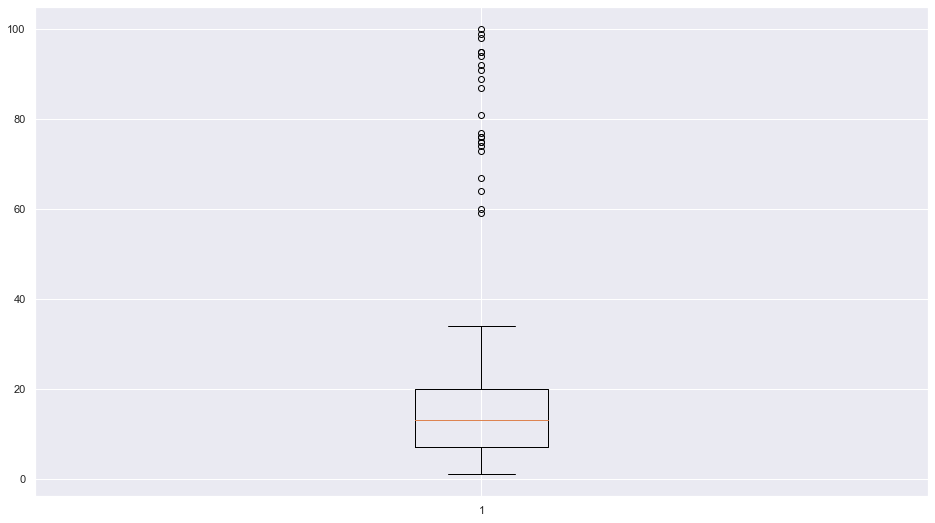

In [852]:
plt.boxplot(df['Interest_Rate']);

##### Outliers exists.

### Adding to correlation dictionary

In [853]:
Credit_Score_useful_column_dict['Interest_Rate'] = corr

# Num_Of_Loan

### Checking Correlation

In [854]:
corr = df['Num_of_Loan'].corr(df_map['Credit_Score'])
corr

0.0020362922854871637

# Delay_from_due_date

### Checking Correlation

In [855]:
corr = df['Delay_from_due_date'].corr(df_map['Credit_Score'])
corr

0.09698369501165087

## Plots

### CountPlot

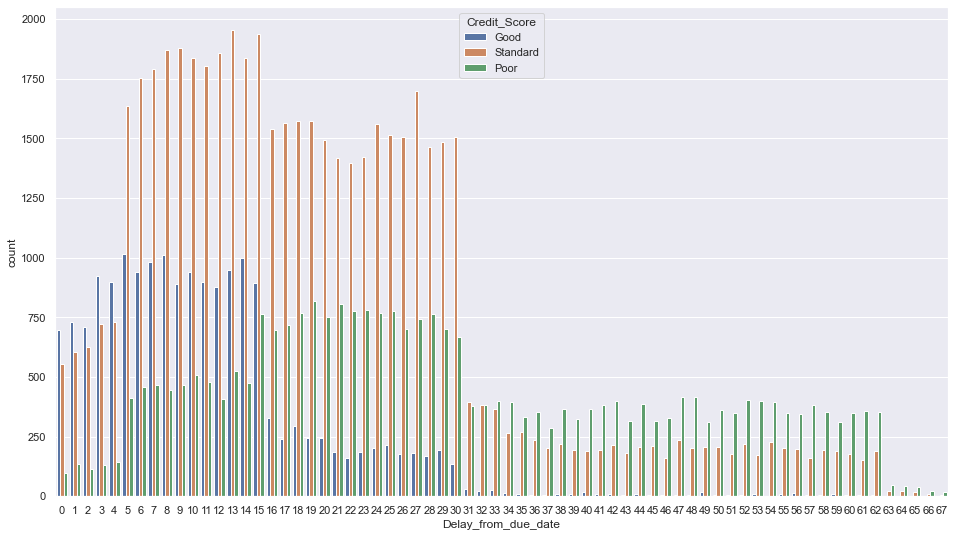

In [856]:
sns.countplot(data = df_age,x = 'Delay_from_due_date', hue = 'Credit_Score' );

### Distribution Plot

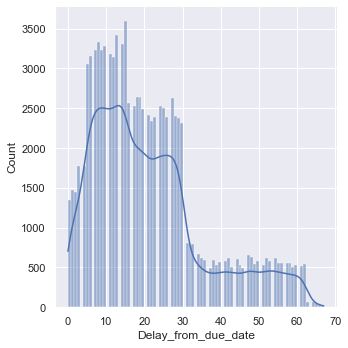

In [857]:
sns.displot(df['Delay_from_due_date'],kde = True);

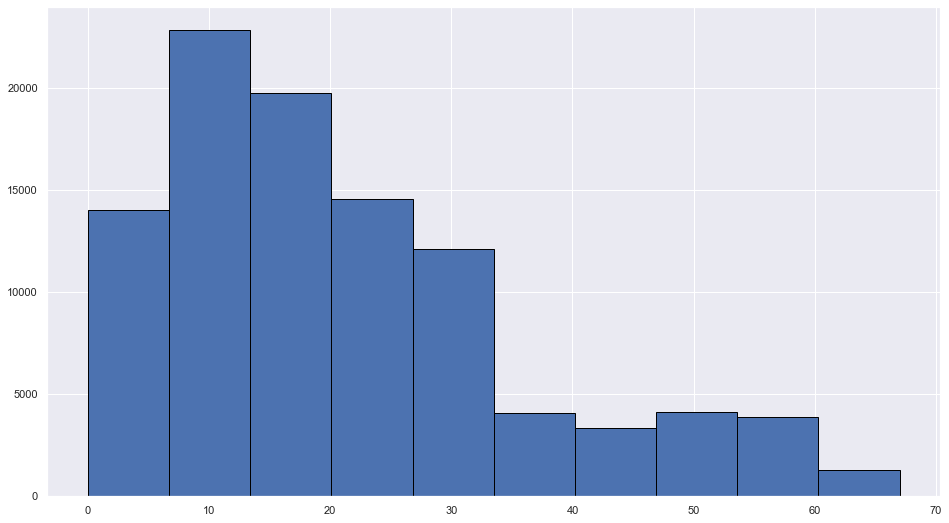

In [858]:
plt.hist(df['Delay_from_due_date'],ec ='black');

### BoxPlot

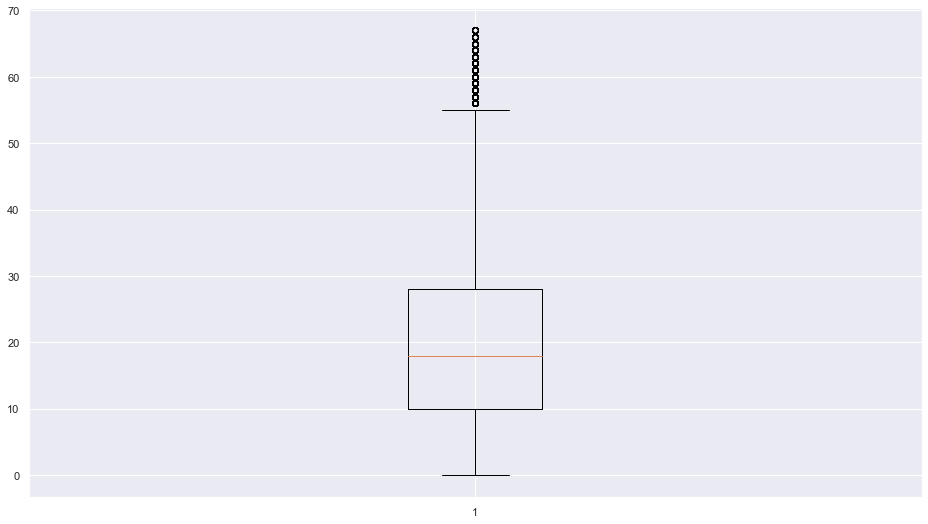

In [859]:
plt.boxplot(df['Delay_from_due_date']);

##### Outliers exist But maybe no need to handle them.

In [860]:
Credit_Score_useful_column_dict['Delay_from_due_date'] = corr

## Type_of_Loan

In [861]:
df_type_of_loan = df.copy()

### Little PreProcessing

In [862]:
corresponding_unique_type_of_loan_values = {}
for ssn in unique_SSN:
    corresponding_unique_type_of_loan_values[ssn] = list(df_type_of_loan[df_type_of_loan['SSN'] == ssn]['Type_of_Loan'].unique())

In [863]:
dict(itertools.islice(corresponding_unique_type_of_loan_values.items(), 5))

{821000265: ['Auto, Credit-Builder, Personal, and HomeEquity'],
 4075839: ['Credit-Builder'],
 486853974: ['Auto, Auto, and NotSpecified'],
 72316145: ['NotSpecified'],
 615067821: ['NotSpecified']}

### Get Unique Type of Loan

In [864]:
types_of_loan = set()

In [865]:

print(' --- Example of Types of Loans ---')
df_type_of_loan['Type_of_Loan'][0]
df_type_of_loan['Type_of_Loan'][10]
print('-------------------------------------------------------------------')
print(' --- After Splitting ---')
df_type_of_loan['Type_of_Loan'][0].split(',')
df_type_of_loan['Type_of_Loan'][0].split(',')[0].split(' Loan')[0].replace(' ','').replace('and','')
df_type_of_loan['Type_of_Loan'][0].split(',')[1].split(' Loan')[0].replace(' ','').replace('and','')
df_type_of_loan['Type_of_Loan'][0].split(',')[2].split(' Loan')[0].replace(' ','').replace('and','')
df_type_of_loan['Type_of_Loan'][0].split(',')[3].split(' Loan')[0].replace(' ','').replace('and','')
print('--------------------------------------------------------------------')

 --- Example of Types of Loans ---


'Auto, Credit-Builder, Personal, and HomeEquity'

'Credit-Builder'

-------------------------------------------------------------------
 --- After Splitting ---


['Auto', ' Credit-Builder', ' Personal', ' and HomeEquity']

'Auto'

'Credit-Builder'

'Personal'

'HomeEquity'

--------------------------------------------------------------------


In [866]:
for values in corresponding_unique_type_of_loan_values.values():
    for i in range(len(values)):
        types_of_loan.add(values[0].split(',')[i].split(' Loan')[0].replace(' ','').replace('and',''))

In [867]:
types_of_loan

{'Auto',
 'Credit-Builder',
 'DebtConsolidation',
 'HomeEquity',
 'Mortgage',
 'NotSpecified',
 'Payday',
 'Personal',
 'Student'}

In [868]:
processed_types_of_loan_list = sorted(list(types_of_loan))
processed_types_of_loan_list

['Auto',
 'Credit-Builder',
 'DebtConsolidation',
 'HomeEquity',
 'Mortgage',
 'NotSpecified',
 'Payday',
 'Personal',
 'Student']

In [869]:
dataframe_type_of_loan_list = sorted(['Credit-Builder Loan',
                               'Not Specified',
                               'Debt Consolidation Loan',
                               'Auto Loan',
                               'Student Loan',
                               'Home Equity Loan', 
                               'Mortgage Loan',
                               'Personal Loan',
                               'Payday Loan'])
dataframe_type_of_loan_list

['Auto Loan',
 'Credit-Builder Loan',
 'Debt Consolidation Loan',
 'Home Equity Loan',
 'Mortgage Loan',
 'Not Specified',
 'Payday Loan',
 'Personal Loan',
 'Student Loan']

### Map the types of Loan

In [870]:
def map_type_of_loan(txt):
    txt = str(txt)
    for i in range(len(processed_types_of_loan_list)):
        txt = txt.replace(' and ', ' ')
        txt = txt.replace(dataframe_type_of_loan_list[i],processed_types_of_loan_list[i])
    return txt

#### Demonstration

In [871]:
txt = 'Credit-Builder Loan,Not Specified,Debt Consolidation Loan,Auto Loan,Student Loan,Home Equity Loan,Mortgage Loan and Personal Loan'
map_type_of_loan(txt)

'Credit-Builder,NotSpecified,DebtConsolidation,Auto,Student,HomeEquity,Mortgage Personal'

In [872]:
df_type_of_loan['Type_of_Loan'] = df_type_of_loan['Type_of_Loan'].apply(map_type_of_loan)

In [873]:
df_type_of_loan['Type_of_Loan'].head()

0    Auto, Credit-Builder, Personal, HomeEquity
1    Auto, Credit-Builder, Personal, HomeEquity
2    Auto, Credit-Builder, Personal, HomeEquity
3    Auto, Credit-Builder, Personal, HomeEquity
4    Auto, Credit-Builder, Personal, HomeEquity
Name: Type_of_Loan, dtype: object

In [874]:
print('Unique Value Count : ',df_type_of_loan['Type_of_Loan'].nunique())
print('Null Value Count : ',df_type_of_loan['Type_of_Loan'].isna().sum())

Unique Value Count :  6260
Null Value Count :  0


In [875]:
index = 0
for type_of_loan in processed_types_of_loan_list:
    df_type_of_loan.insert(loc = 11 + index, column = type_of_loan , value = 0)
    index += 1

In [876]:
# df_type_of_loan.drop(columns = 'NotSpecified',inplace = True)

In [877]:
for type_of_loan in processed_types_of_loan_list:    
    df_type_of_loan[type_of_loan] = df_type_of_loan['Type_of_Loan'].apply(lambda x:1 if type_of_loan in x else 0)

In [878]:
df_type_of_loan['Auto'].unique()

array([1, 0], dtype=int64)

In [879]:
for type_of_loan in processed_types_of_loan_list:
    print(f"Corr Of {type_of_loan} : {df_type_of_loan[type_of_loan].corr(df_map['Credit_Score'])}")

Corr Of Auto : 0.026570895283437507
Corr Of Credit-Builder : 0.02456224809490043
Corr Of DebtConsolidation : 0.03214554903559644
Corr Of HomeEquity : 0.026375715646832543
Corr Of Mortgage : 0.020499493301207167
Corr Of NotSpecified : -0.010108292655661849
Corr Of Payday : 0.02562969982467671
Corr Of Personal : 0.03671315727983152
Corr Of Student : 0.016660548951641832


### Counting each type of loan

In [880]:
for type_of_loan in processed_types_of_loan_list:
    print(f"Count Of {type_of_loan} : {(df_type_of_loan[type_of_loan] == 1).sum()}")

Count Of Auto : 30560
Count Of Credit-Builder : 31728
Count Of DebtConsolidation : 31040
Count Of HomeEquity : 31400
Count Of Mortgage : 31360
Count Of NotSpecified : 43088
Count Of Payday : 31944
Count Of Personal : 31104
Count Of Student : 31040


### Plot

### Count Plot

<AxesSubplot:xlabel='Auto', ylabel='count'>

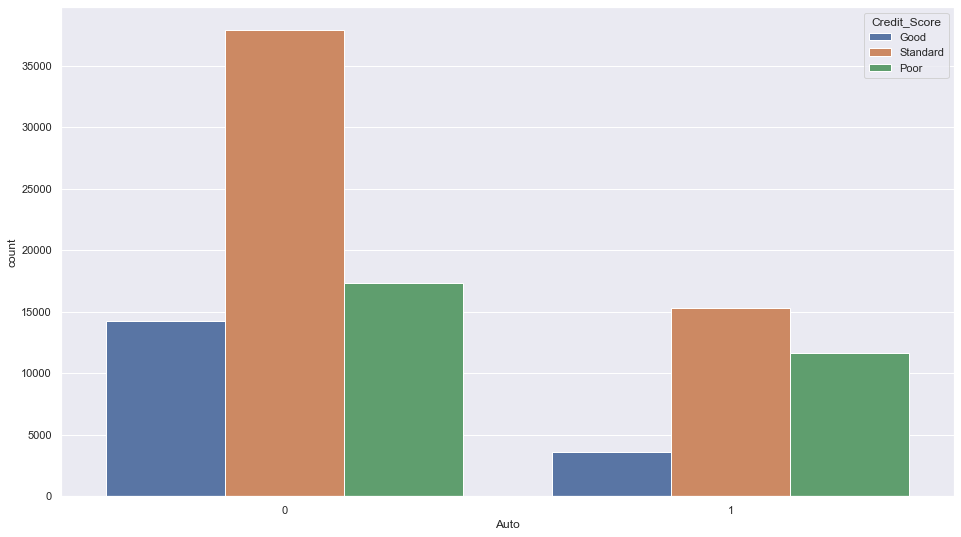

<AxesSubplot:xlabel='Credit-Builder', ylabel='count'>

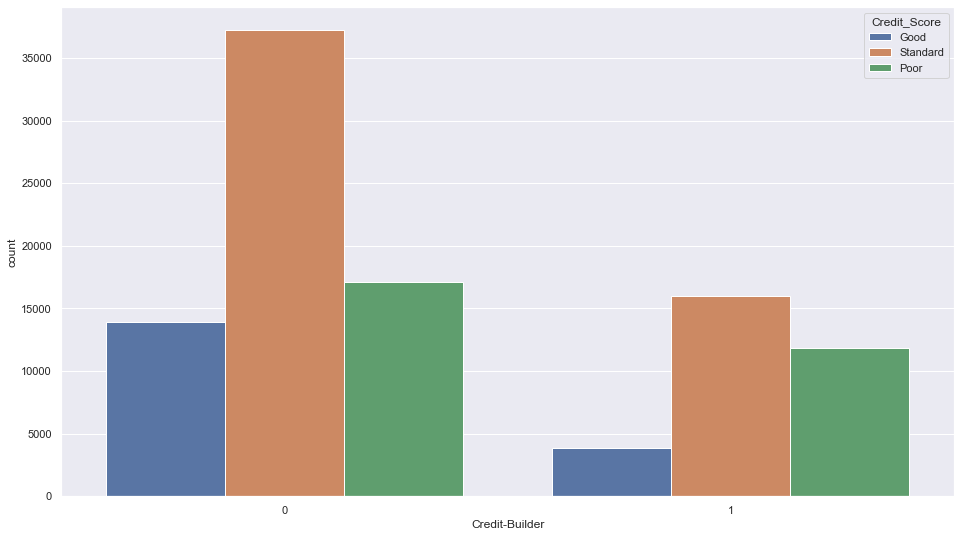

<AxesSubplot:xlabel='DebtConsolidation', ylabel='count'>

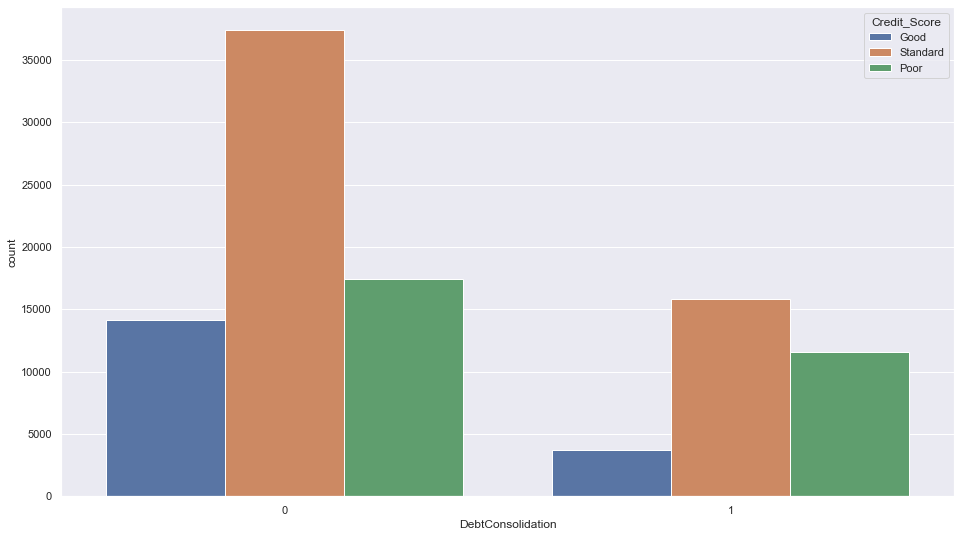

<AxesSubplot:xlabel='HomeEquity', ylabel='count'>

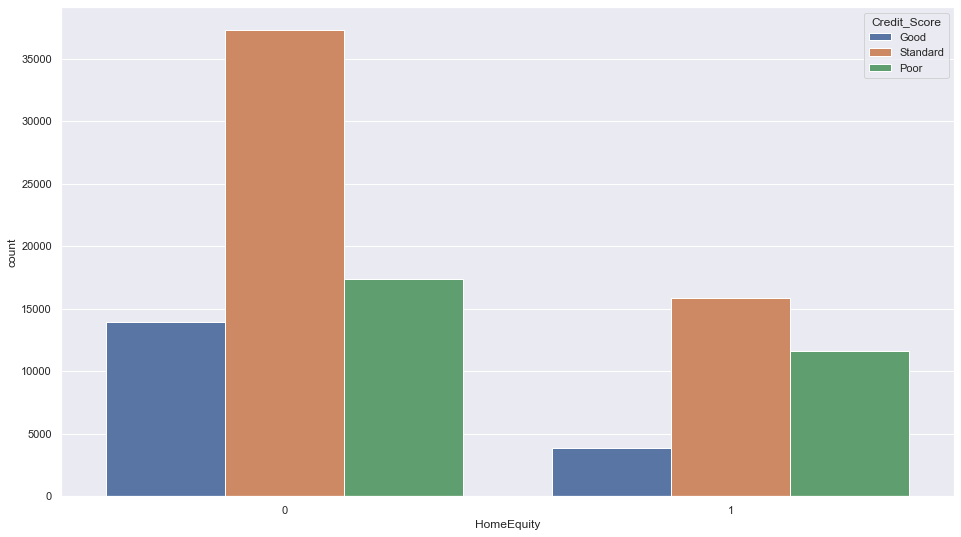

<AxesSubplot:xlabel='Mortgage', ylabel='count'>

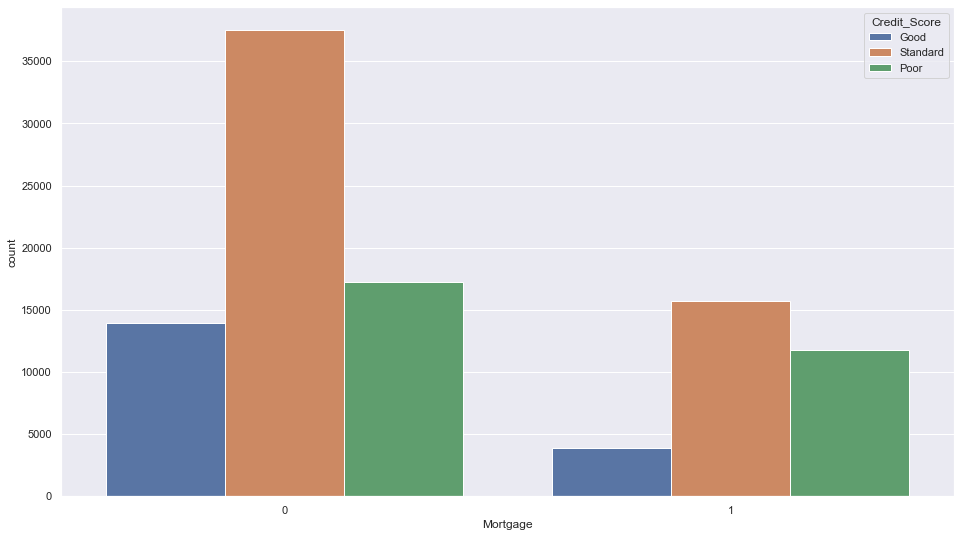

<AxesSubplot:xlabel='NotSpecified', ylabel='count'>

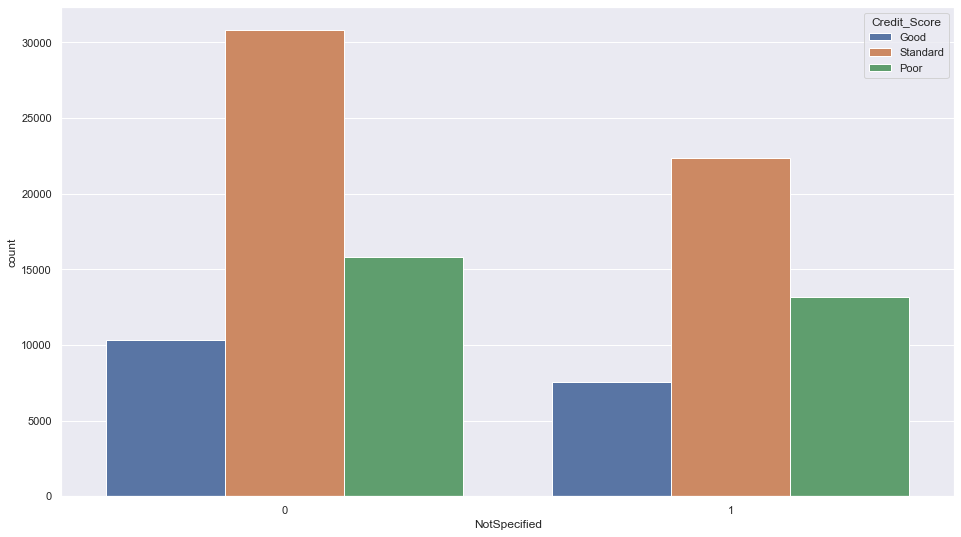

<AxesSubplot:xlabel='Payday', ylabel='count'>

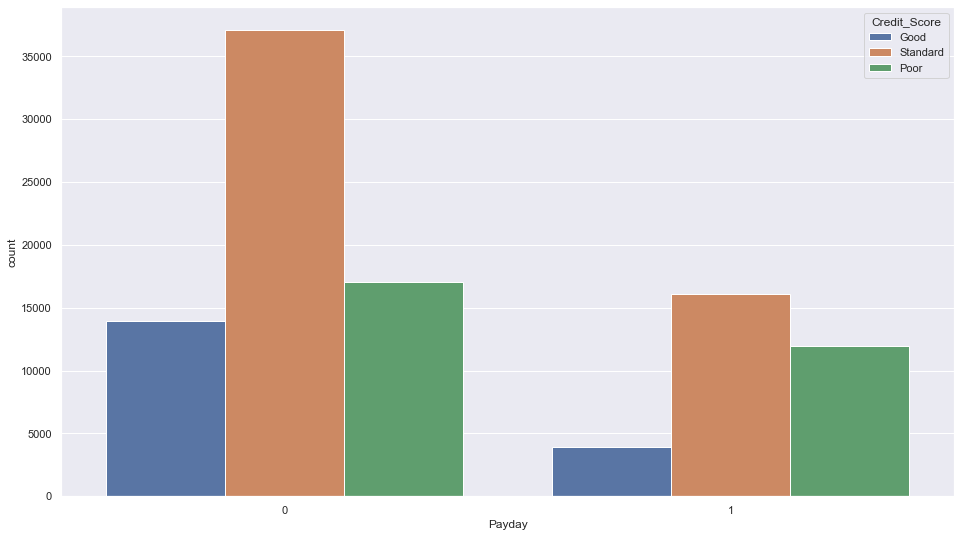

<AxesSubplot:xlabel='Personal', ylabel='count'>

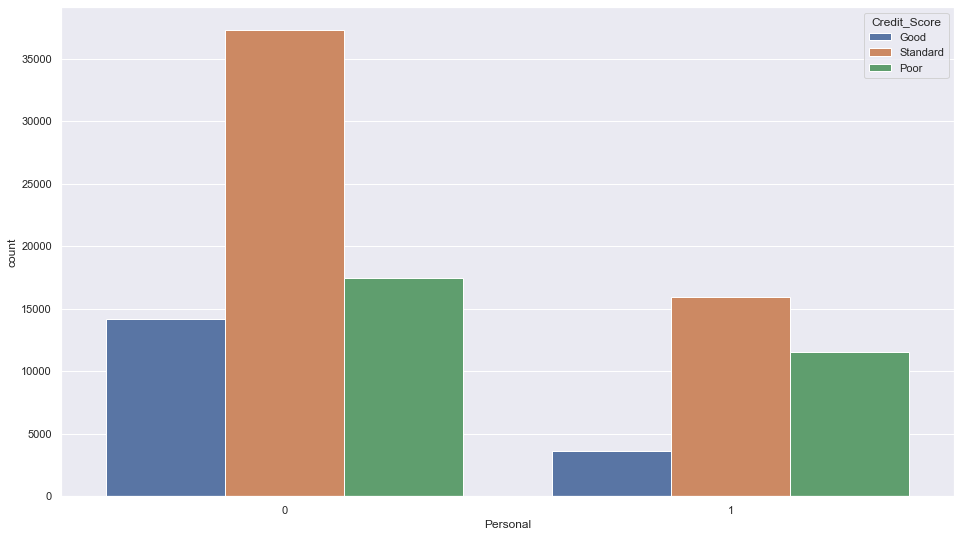

<AxesSubplot:xlabel='Student', ylabel='count'>

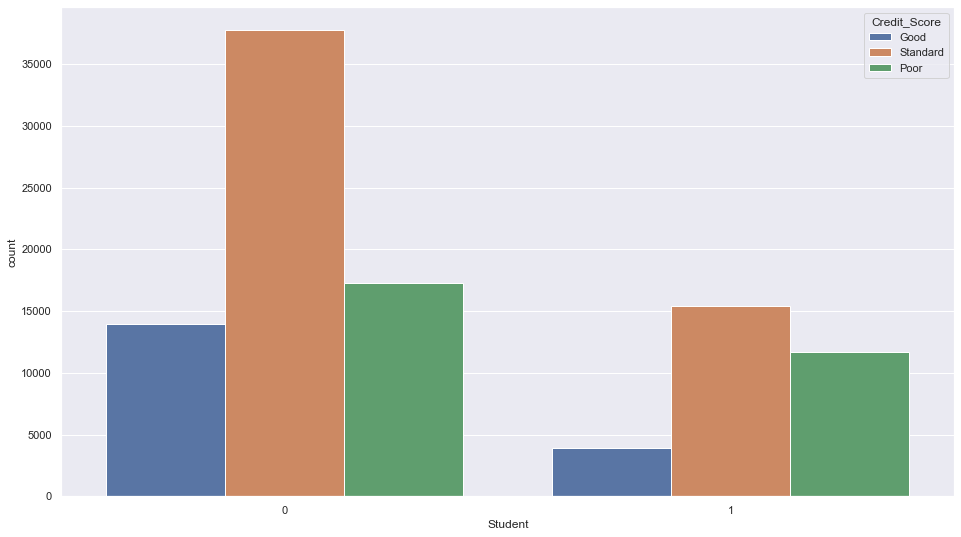

In [881]:
for type_of_loan in processed_types_of_loan_list:
    sns.countplot(data = df_type_of_loan,x = f'{type_of_loan}', hue = 'Credit_Score' );
    plt.show()

# Num_of_Delayed_Payment

### Checking Correlation

In [882]:
corr = df['Num_of_Delayed_Payment'].corr(df_map['Credit_Score'])
corr

0.007828412403483004

##### Little or no Correlation exists between Num_of_Delayed_Payment and Credit_Score

# Changed_Credit_Limit

### Checking Correlation

In [883]:
corr = df['Changed_Credit_Limit'].corr(df_map['Credit_Score'])
corr

0.18884155436556935

In [884]:
df['Changed_Credit_Limit'].describe()

count    100000.000000
mean         10.389833
std           6.788732
min          -6.490000
25%           5.330000
50%           9.400000
75%          14.850000
max          36.970000
Name: Changed_Credit_Limit, dtype: float64

## Plot

### Mapping

In [885]:
df_changed_credit_limit = df.copy()
def map_changed_credit_limit(credit):
    if credit < 5:
        return 0
    if credit >= 5 and credit < 9:
        return 1
    if credit >= 9 and credit <15:
        return 2
    else:
        return 3 


### Countplot

In [886]:
df_changed_credit_limit['Changed_Credit_Limit'] = df_changed_credit_limit['Changed_Credit_Limit'].map(map_changed_credit_limit)

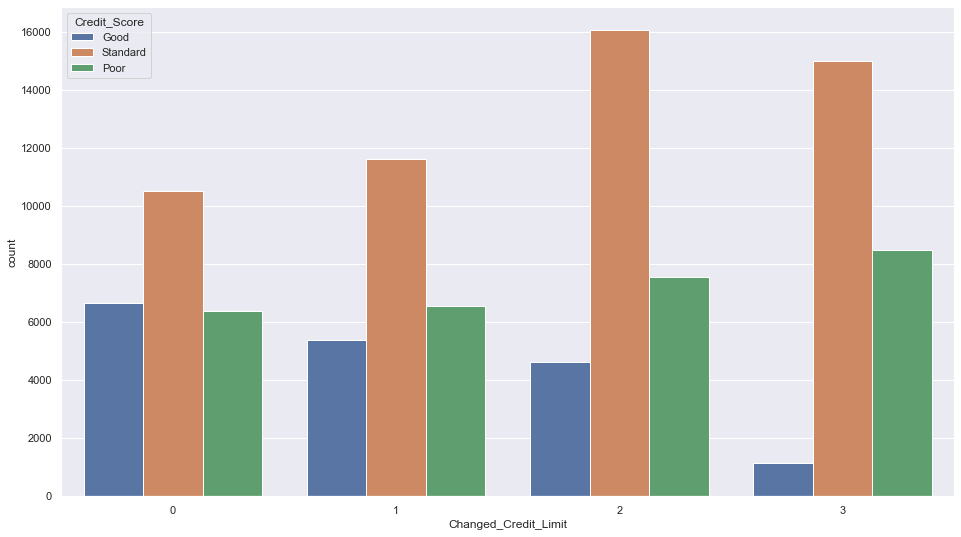

In [887]:
sns.countplot(data = df_changed_credit_limit,x = 'Changed_Credit_Limit', hue = 'Credit_Score' );

### Distribution Plots

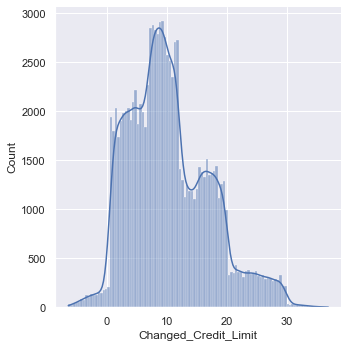

In [888]:
sns.displot(df['Changed_Credit_Limit'],kde = True);

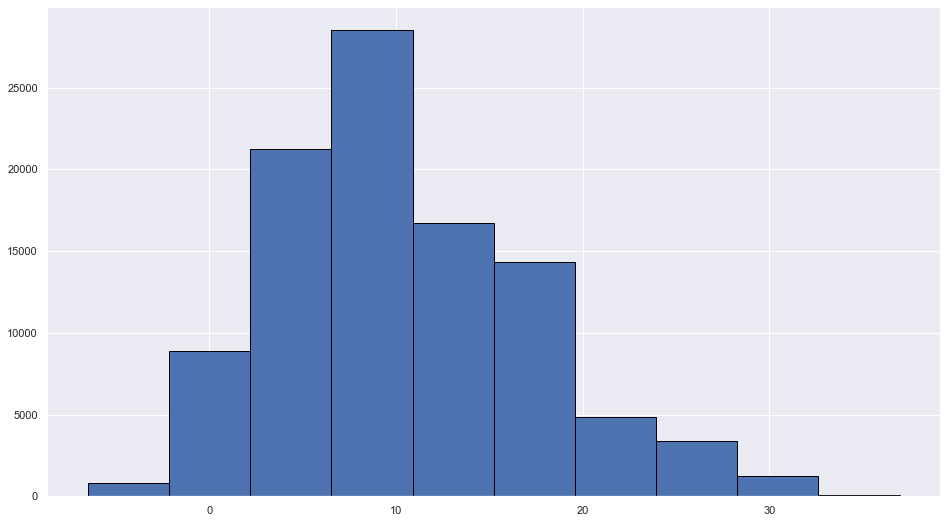

In [889]:
plt.hist(df['Changed_Credit_Limit'],ec ='black');

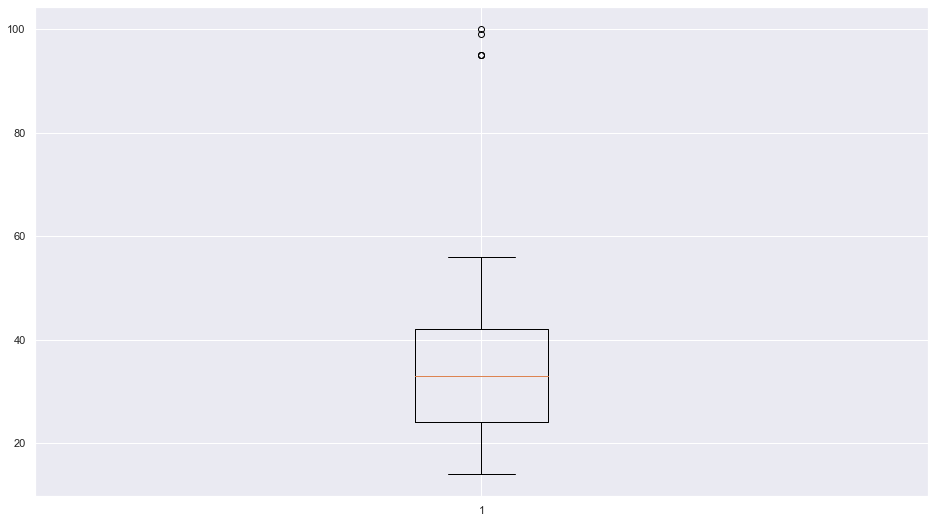

In [890]:
plt.boxplot(df['Age']);

#### Outliers exists but maynot be needed to handle. ALso there is no or little skewness.

### Adding to Useful Column Dict.

In [891]:
Credit_Score_useful_column_dict['Changed_Credit_Limit'] = corr

# Num_Credit_Inquries

### Checking Correlation

In [892]:
df['Num_Credit_Inquiries'].corr(df_map['Credit_Score'])

0.0019119813464492362

# Credit_Mix

### Checking Correlation

In [893]:
df['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [894]:
df_Credit_Mix = df.copy()
df_Credit_Mix['Credit_Mix'] = le.fit_transform(df_Credit_Mix['Credit_Mix'])

In [895]:
corr = df_Credit_Mix['Credit_Mix'].corr(df_map['Credit_Score'])
corr

0.22991974710079513

## Plot

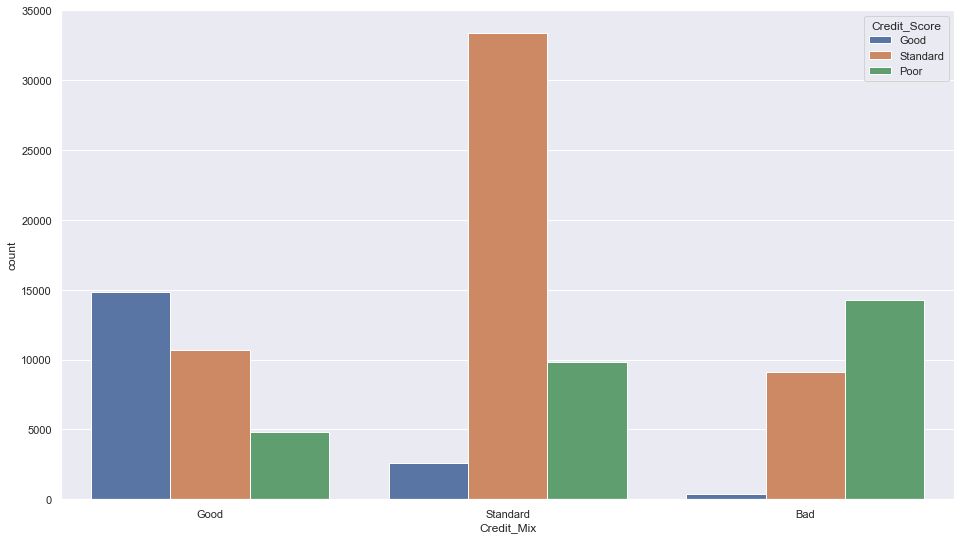

In [896]:
sns.countplot(data = df_age,x = 'Credit_Mix', hue = 'Credit_Score' );

### Distribution Plot

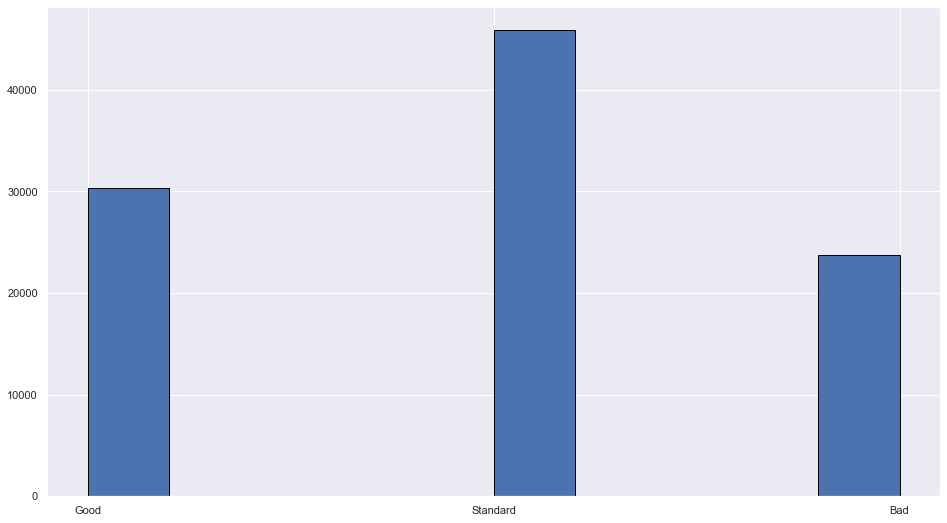

In [897]:
plt.hist(df['Credit_Mix'],ec ='black');

### Adding to useful column dict

In [898]:
Credit_Score_useful_column_dict['Credit_Mix'] = corr

In [899]:
Credit_Score_useful_column_dict

{'Monthly_Inhand_Salary': -0.07895538995801313,
 'Num_Bank_Accounts': 0.1732344260940423,
 'Num_Credit_Card': 0.10959523004266675,
 'Interest_Rate': 0.12016992140838731,
 'Delay_from_due_date': 0.09698369501165087,
 'Changed_Credit_Limit': 0.18884155436556935,
 'Credit_Mix': 0.22991974710079513}

# Outstanding Debt

### Checking Correlation

In [900]:
corr = df['Outstanding_Debt'].corr(df_map['Credit_Score'])
corr

0.03715290308645986

In [901]:
df['Outstanding_Debt'].describe()

count    100000.000000
mean       1426.220376
std        1155.129026
min           0.230000
25%         566.072500
50%        1166.155000
75%        1945.962500
max        4998.070000
Name: Outstanding_Debt, dtype: float64

## Plots

### Map Outstanding Debt

In [902]:
df_outstanding_debt = df.copy()
def map_outstanding_debt(debt):
    if debt < 566:
        return 0
    if debt >= 566 and debt < 1166:
        return 1
    if debt >= 1166 and debt < 1946:
        return 2
    else:
        return 3

In [903]:
df_outstanding_debt['Outstanding_Debt'] = df_outstanding_debt['Outstanding_Debt'].map(map_outstanding_debt)

### Count Plot

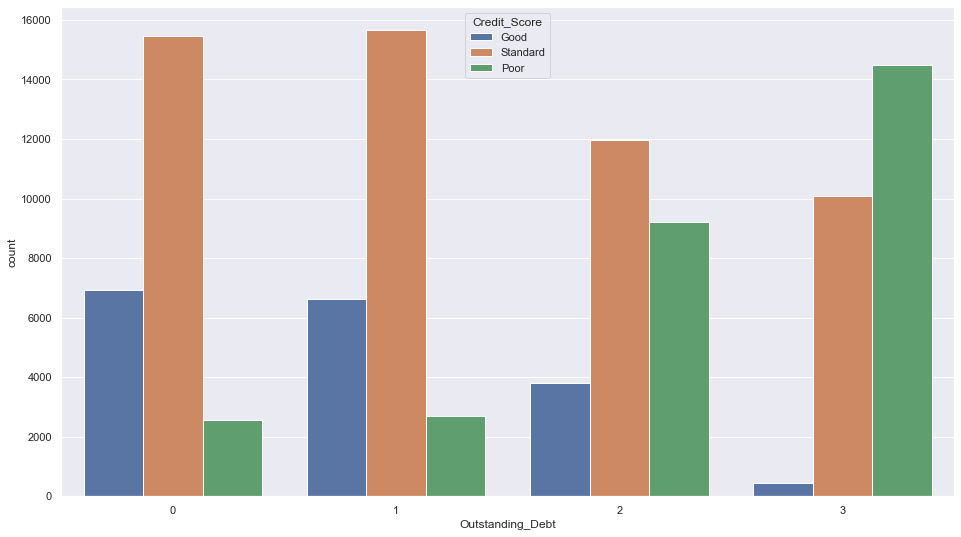

In [904]:
sns.countplot(data = df_outstanding_debt,x = 'Outstanding_Debt', hue = 'Credit_Score' );

### Distribution Plots

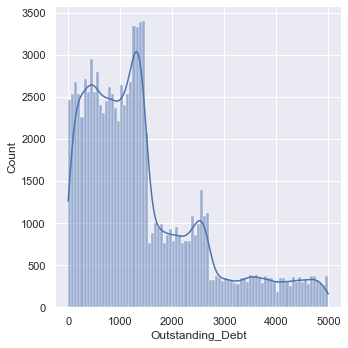

In [905]:
sns.displot(df['Outstanding_Debt'],kde = True);

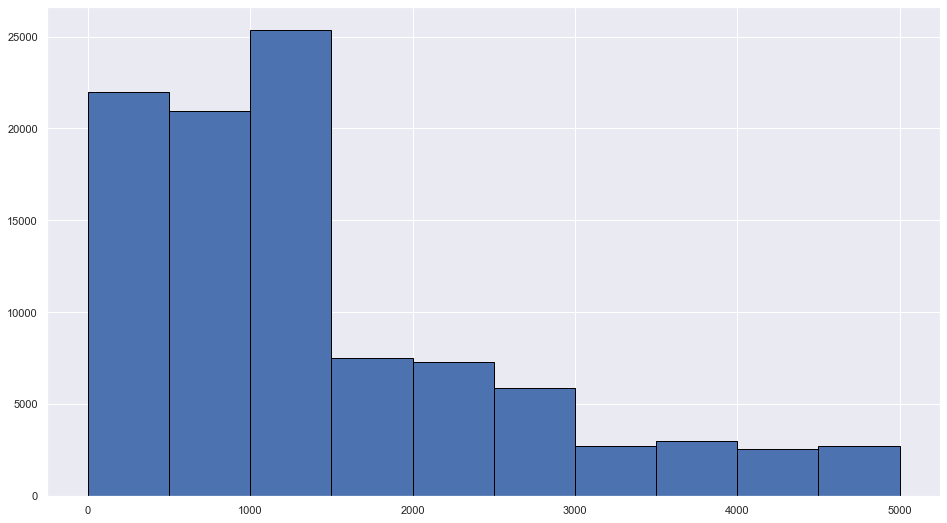

In [906]:
plt.hist(df['Outstanding_Debt'],ec ='black');

### Box Plot

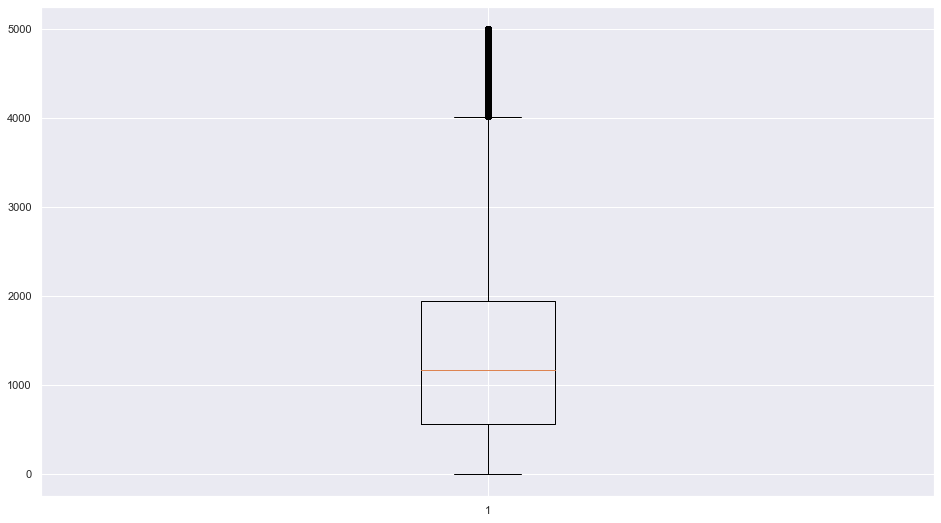

In [907]:
plt.boxplot(df['Outstanding_Debt']);

### Adding to useful column dict

In [908]:
Credit_Score_useful_column_dict['Outstanding_Debt'] = corr

# Credit_Utilization_Ratio

### Checking Correlation

In [909]:
corr = df['Credit_Utilization_Ratio'].corr(df_map['Credit_Score'])
corr

-0.014370645046537579

In [910]:
df['Credit_Utilization_Ratio'].describe()

count    100000.000000
mean         32.285173
std           5.116875
min          20.000000
25%          28.052567
50%          32.305784
75%          36.496663
max          50.000000
Name: Credit_Utilization_Ratio, dtype: float64

### Map

In [911]:
df_credit_utilization_ratio = df.copy()
def map_credit_utilization_ratio(credit):
    if credit < 28:
        return 0
    elif credit in range(28,32):
        return 1
    elif credit in range(32,36):
        return 2
    else:
        return 3

In [912]:
df_credit_utilization_ratio['Credit_Utilization_Ratio'] = df_credit_utilization_ratio['Credit_Utilization_Ratio'].map(map_credit_utilization_ratio)

## Plots

### Count Plot

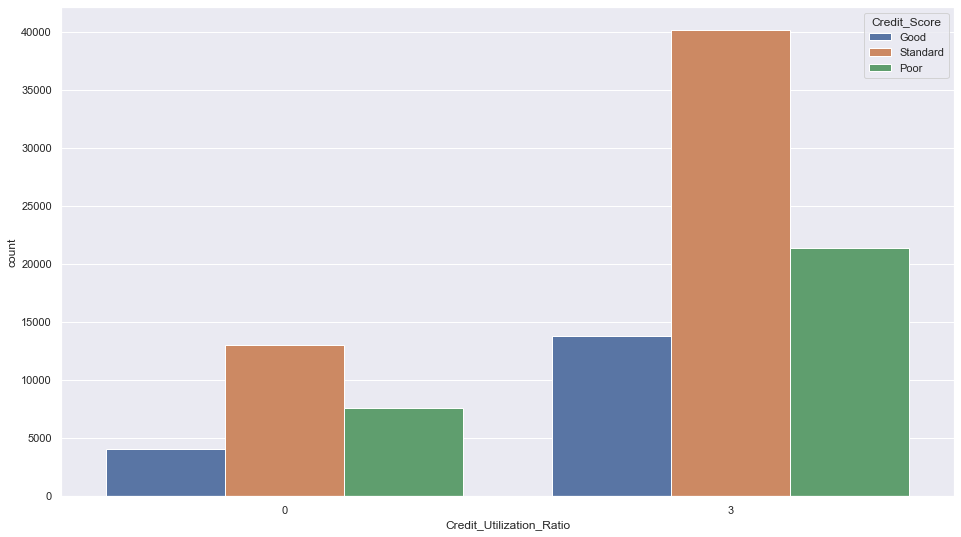

In [913]:
sns.countplot(data = df_credit_utilization_ratio,x = 'Credit_Utilization_Ratio' , hue = 'Credit_Score' );

### Distribution Plot

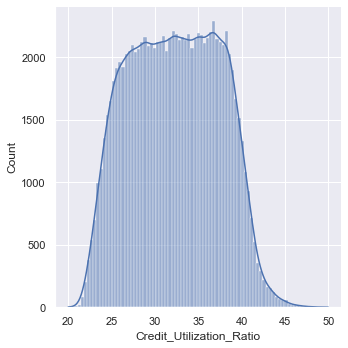

In [914]:
sns.displot(df['Credit_Utilization_Ratio'],kde = True);

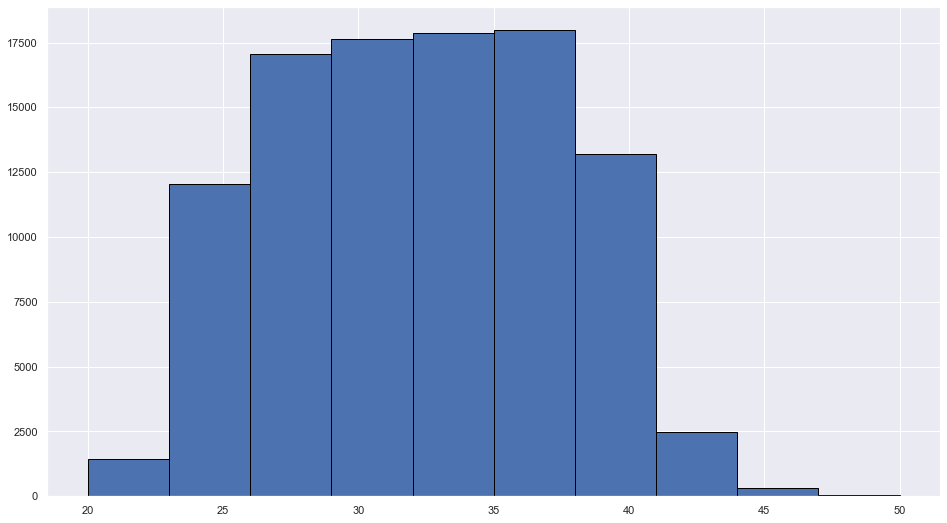

In [915]:
plt.hist(df['Credit_Utilization_Ratio'],ec ='black');

### Box Plot

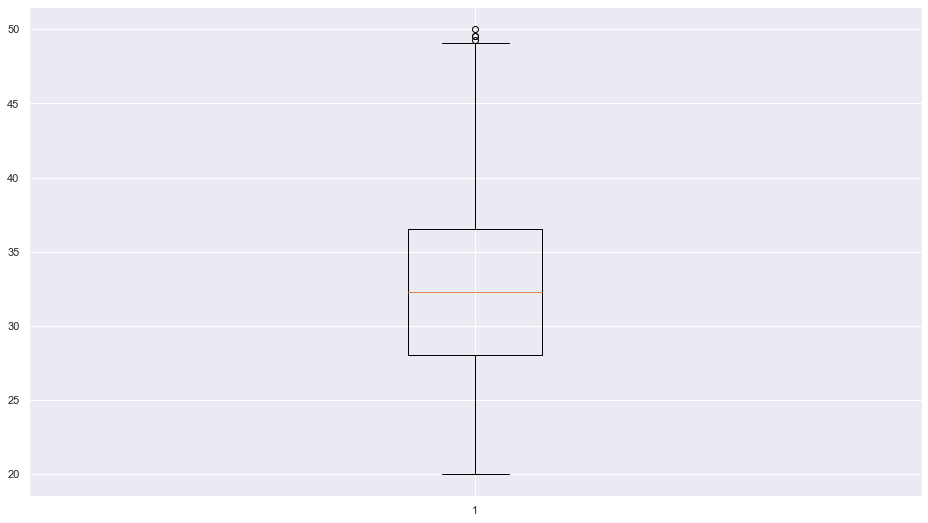

In [916]:
plt.boxplot(df['Credit_Utilization_Ratio']);

### Adding to useful column dict

In [917]:
Credit_Score_useful_column_dict['Credit_Utilization_Ratio'] = corr

# Credit_History_Age (In Months)

### Checking Correlation

In [918]:
corr = df['Credit_History_Age'].corr(df_map['Credit_Score'])
corr

-0.10260303138198693

In [919]:
df['Credit_History_Age'].describe()

count    100000.000000
mean        221.206880
std          99.681112
min           1.000000
25%         144.000000
50%         219.000000
75%         302.000000
max         404.000000
Name: Credit_History_Age, dtype: float64

In [920]:
df_credit_history_age = df.copy()
def map_credit_history_age(age):
    if age < 144:
        return 0
    elif age >= 144 and age < 219:
        return 1
    elif age >= 219 and age < 302:
        return 2
    else:
        return 3

# Plots

In [921]:
df_credit_history_age['Credit_History_Age'] = df_credit_history_age['Credit_History_Age'].map(map_credit_history_age)

### Count Plot

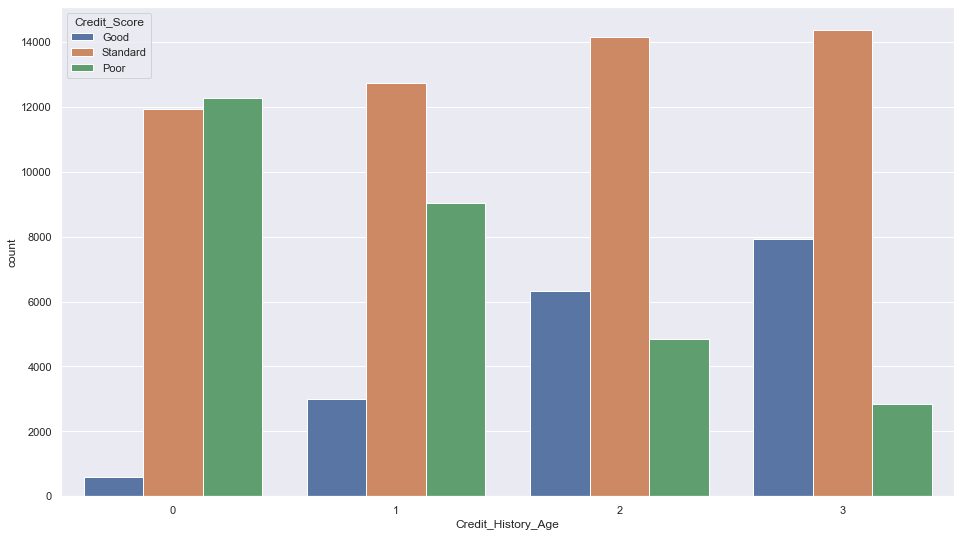

In [922]:
sns.countplot(data = df_credit_history_age,x = 'Credit_History_Age', hue = 'Credit_Score' );

### Distribution Plot

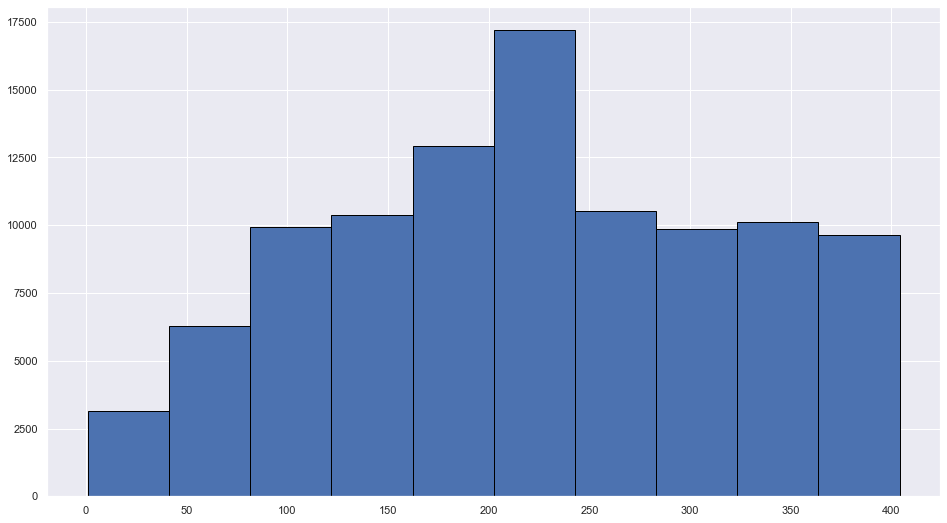

In [923]:
plt.hist(df['Credit_History_Age'],ec ='black');

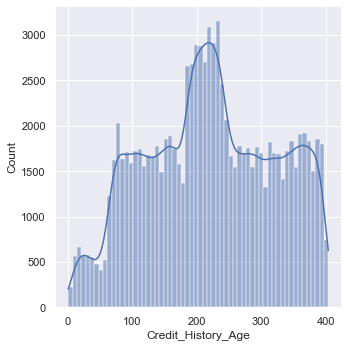

In [924]:
sns.displot(df['Credit_History_Age'],kde = True);

### Add Credit History Age to useful column list

In [925]:
Credit_Score_useful_column_dict['Credit_History_Age'] = corr

# Paymennt_Of_Min_Amount

### Checking Correlation

In [926]:
df_payment_of_min_amount = df.copy()
df_payment_of_min_amount['Payment_of_Min_Amount'] = le.fit_transform(df_payment_of_min_amount['Payment_of_Min_Amount'])

In [927]:
corr = df_payment_of_min_amount['Payment_of_Min_Amount'].corr(df_map['Credit_Score'])
corr

0.2782347205832002

## Plot

### Count Plot

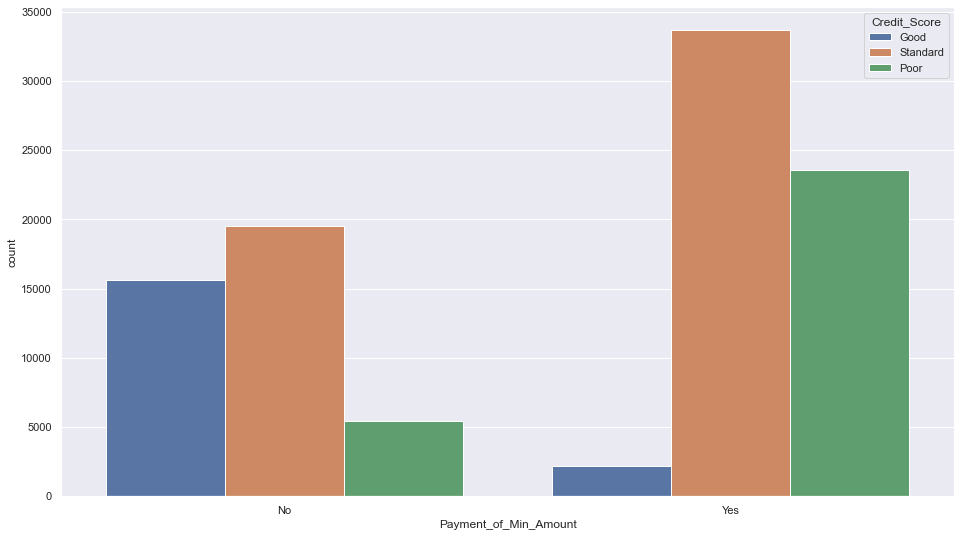

In [928]:
sns.countplot(data = df,x = 'Payment_of_Min_Amount', hue = 'Credit_Score' );

### Dist Plot

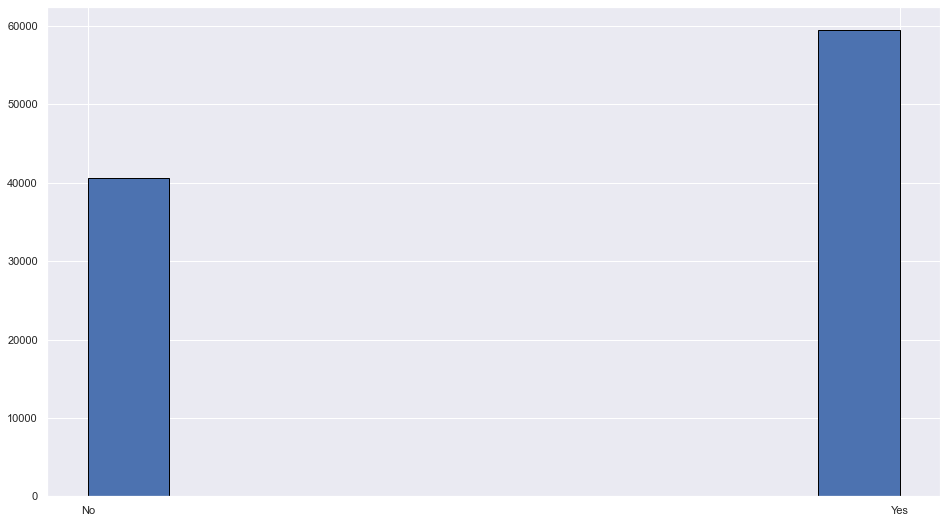

In [929]:
plt.hist(df['Payment_of_Min_Amount'],ec ='black');

### Add to useful column_dict

In [930]:
Credit_Score_useful_column_dict['Payment_of_Min_Amount'] = corr

# Total_Emi_per_month

### Checking Correlation

In [931]:
corr = df['Total_EMI_per_month'].corr(df_map['Credit_Score'])
corr

-0.0023689972359512085

# Amount Monthly Invested

### Checking Correlation

In [932]:
df_amount_monthly_invested = df.copy()

In [933]:
df_amount_monthly_invested.dropna(axis = 0, inplace = True)

In [934]:
corr = df_amount_monthly_invested['Amount_invested_monthly'].corr(df_map['Credit_Score'])
corr

-0.008203298486098614

# Payment_Behavior

### Checking Correlation

In [935]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', 'NotSpecified',
       'High_spent_Large_value_payments'], dtype=object)

In [936]:
df_payment_behaviour = df.copy()
df_payment_behaviour['Payment_Behaviour'] = le.fit_transform(df_payment_behaviour['Payment_Behaviour'])

In [937]:
corr = df_payment_behaviour['Payment_Behaviour'].corr(df_map['Credit_Score'])
corr

0.018792730308937577

## Plot

### Count Plot

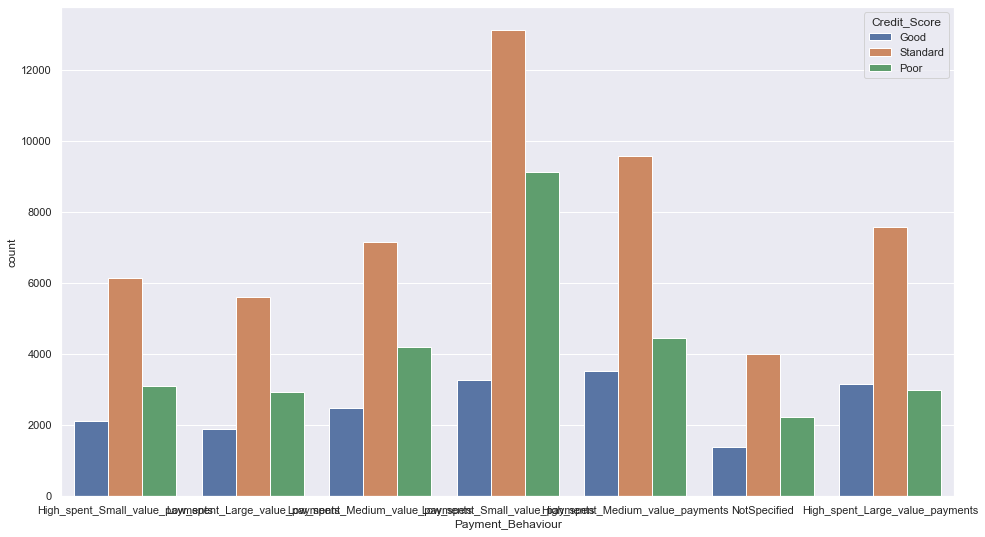

In [938]:
sns.countplot(data = df,x = 'Payment_Behaviour', hue = 'Credit_Score' );

### Distribution Plot

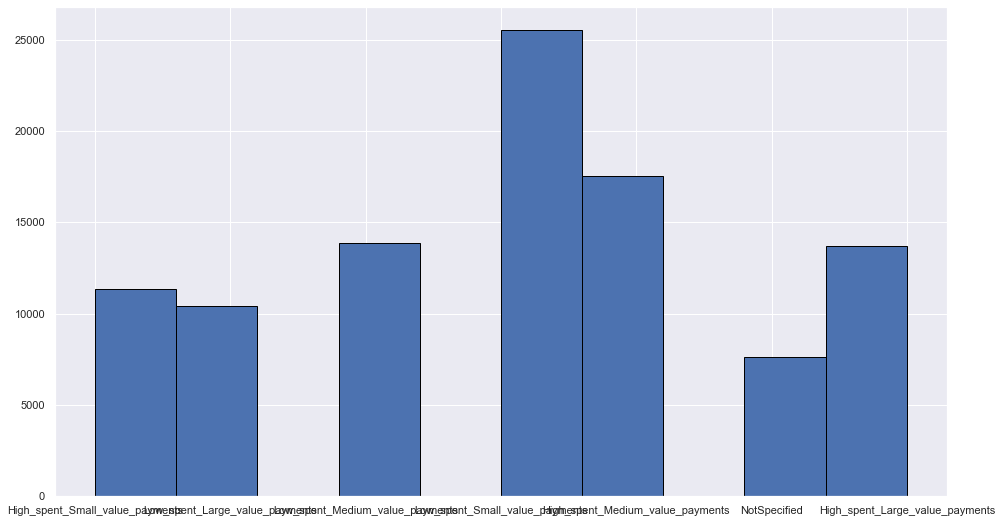

In [939]:
plt.hist(df['Payment_Behaviour'],ec ='black');

### Adding Payment_Behaviour to useful column dict

In [940]:
Credit_Score_useful_column_dict['Payment_Behaviour'] = corr

# Monthly Balance

### Checking Correlation

In [941]:
corr = df['Monthly_Balance'].corr(df_map['Credit_Score'])
corr

-0.06117597060384457

In [942]:
df['Monthly_Balance'].describe()

count    100000.000000
mean        403.492393
std         214.423009
min           0.007760
25%         270.322511
50%         337.270985
75%         471.928804
max        1602.040519
Name: Monthly_Balance, dtype: float64

### Map

In [943]:
df_monthly_balance = df.copy()
def map_monthly_balance(balance):
    if balance < 270:
        return 0
    elif balance >= 270 and balance < 337:
        return 1
    elif balance >= 337 and balance < 472:
        return 2
    else:
        return 3

In [944]:
df_monthly_balance['Monthly_Balance'] = df_monthly_balance['Monthly_Balance'].map(map_monthly_balance)

## Plot

### Count Plot

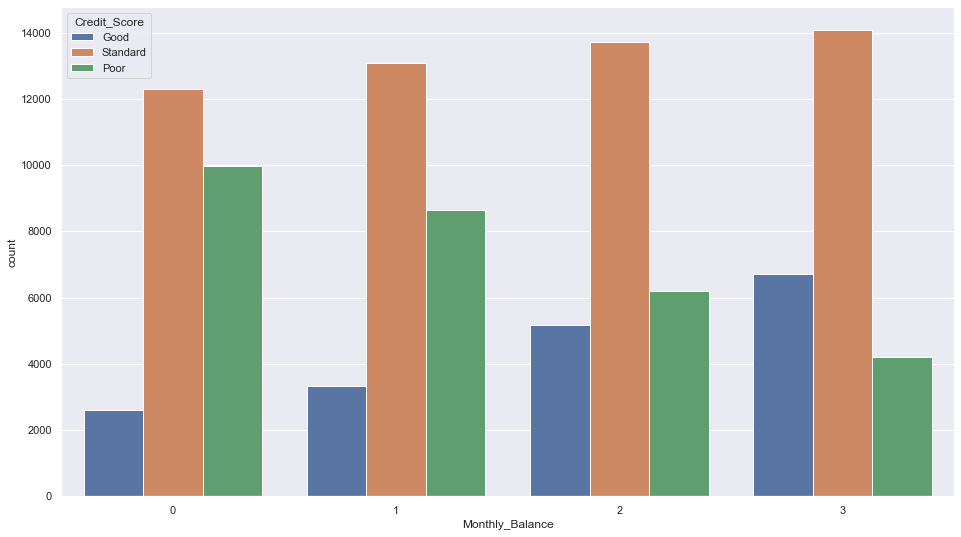

In [945]:
sns.countplot(data = df_monthly_balance,x = 'Monthly_Balance', hue = 'Credit_Score' );

### Distribution Plot

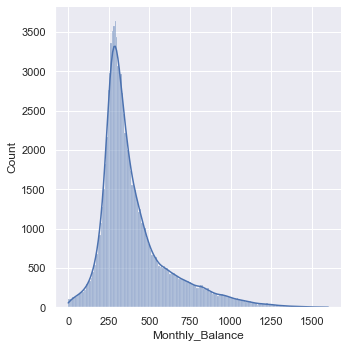

In [946]:
sns.displot(df['Monthly_Balance'],kde = True);

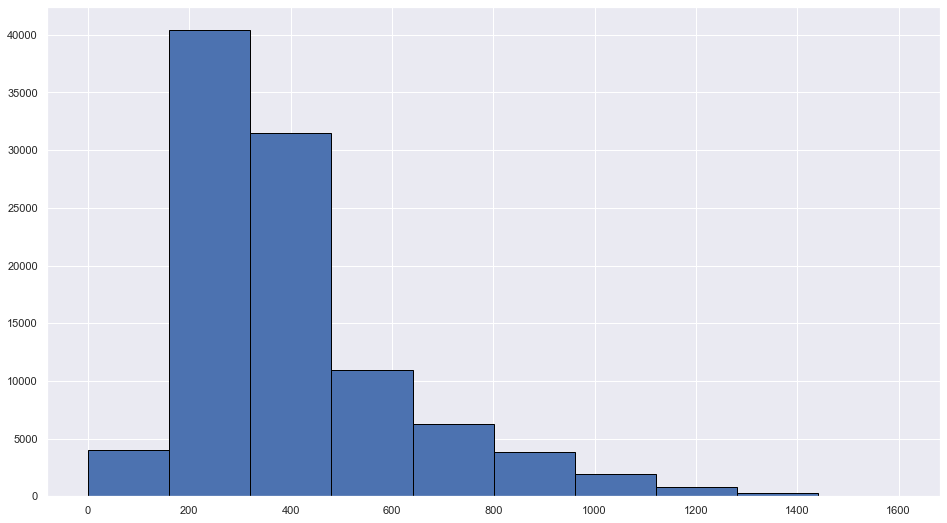

In [947]:
plt.hist(df['Monthly_Balance'],ec ='black');

### Box Plot

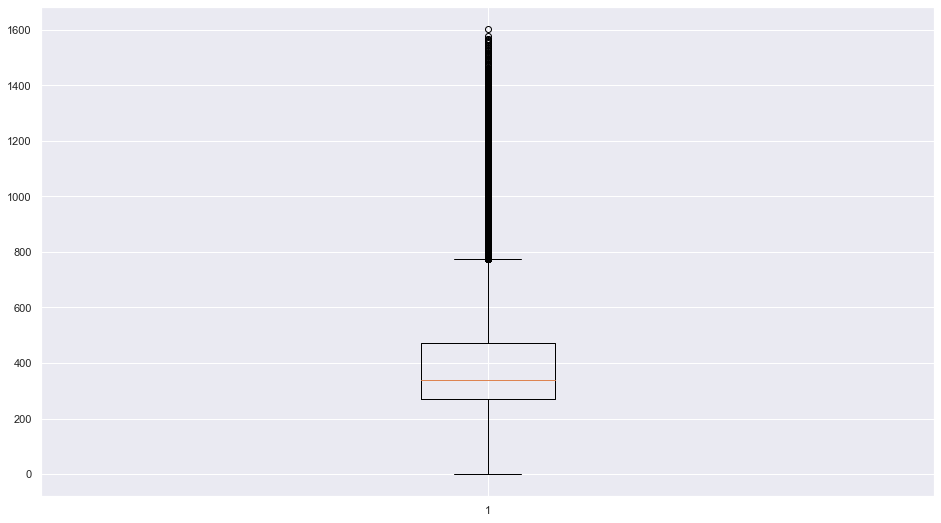

In [948]:
plt.boxplot(df['Monthly_Balance']);

In [949]:
Credit_Score_useful_column_dict['Monthly_Balance'] = corr

### So following Features were extracted.

In [950]:
Credit_Score_useful_column_dict

{'Monthly_Inhand_Salary': -0.07895538995801313,
 'Num_Bank_Accounts': 0.1732344260940423,
 'Num_Credit_Card': 0.10959523004266675,
 'Interest_Rate': 0.12016992140838731,
 'Delay_from_due_date': 0.09698369501165087,
 'Changed_Credit_Limit': 0.18884155436556935,
 'Credit_Mix': 0.22991974710079513,
 'Outstanding_Debt': 0.03715290308645986,
 'Credit_Utilization_Ratio': -0.014370645046537579,
 'Credit_History_Age': -0.10260303138198693,
 'Payment_of_Min_Amount': 0.2782347205832002,
 'Payment_Behaviour': 0.018792730308937577,
 'Monthly_Balance': -0.06117597060384457}